In [26]:
import os
import sys
sys.path.append(os.path.dirname(os.getcwd()))

In [27]:
import numpy as np
from matplotlib import pyplot as plt

from dlf.sequential import Sequential
from dlf.layers.dense import Dense
from dlf.activation_functions.tanh import TanH
from dlf.activation_functions.relu import ReLU
from dlf.activation_functions.sigmoid import Sigmoid
from dlf.losses.bce import BinaryCrossEntropy
from dlf.regularization.dropout import Dropout
from dlf.optimizers.mgd import MomentumGradientDescent
from dlf.optimizers.rmsprop import RMSProp
from dlf.optimizers.adam import AdaptiveMomentEstimation
from dlf.trainer import Trainer
from dlf.initializers.he_normal import HeNormal
from dlf.schedulers.exponential import ExponentialScheduler
from dlf.schedulers.step import StepScheduler

from dlf.utils.dataset import train_test_split

In [28]:
m, n = 2000, 3
inputs = np.random.randn(m, n)
labels = (inputs.sum(axis=1, keepdims=True) > 0).astype(int)

In [29]:
training_inputs, training_labels, testing_inputs, testing_labels = train_test_split(inputs, labels, 0.7)
testing_inputs, testing_labels, validation_inputs, validation_labels = train_test_split(testing_inputs, testing_labels, 0.5)

In [30]:
print(training_inputs.shape, training_labels.shape)
print(validation_inputs.shape, validation_labels.shape)
print(testing_inputs.shape, testing_labels.shape)

(1400, 3) (1400, 1)
(300, 3) (300, 1)
(300, 3) (300, 1)


In [31]:
training_set = (training_inputs, training_labels)
validation_set = (validation_inputs, validation_labels)
testing_set = (testing_inputs, testing_labels)

In [32]:
model = Sequential([
    Dense(3, 8, initializer=HeNormal()),
    TanH(),
    Dense(8, 16),
    ReLU(),
    Dropout(keep_prob=0.8),
    Dense(16, 1),
    Sigmoid()
])

In [33]:
loss = BinaryCrossEntropy()

In [34]:
n_epochs = 100
learning_rate = 0.001
batch_size = 128
beta = 0.9
decay_rate = 0.9
step_size = 10

In [35]:
# optimizer = MomentumGradientDescent(learning_rate, beta)
# optimizer = RMSProp(learning_rate)
optimizer = AdaptiveMomentEstimation(learning_rate)

In [36]:
# trainer = Trainer(model, optimizer, loss, lr_scheduler=ExponentialScheduler(decay_rate))
trainer = Trainer(model, optimizer, loss, lr_scheduler=StepScheduler(step_size, decay_rate))
# trainer = Trainer(model, optimizer, loss)

In [37]:
history = trainer.fit(training_set, n_epochs, batch_size)

[1/100]: Training Loss = 1.1632096239910343
[2/100]: Training Loss = 0.9562587001153653
[3/100]: Training Loss = 0.7849118018150637
[4/100]: Training Loss = 0.6860694667028043
[5/100]: Training Loss = 0.6314264487088697
[6/100]: Training Loss = 0.5857600107572314
[7/100]: Training Loss = 0.5296056582871491
[8/100]: Training Loss = 0.5334062102624048
[9/100]: Training Loss = 0.4950094749664142
[10/100]: Training Loss = 0.4488946064510789
[11/100]: Training Loss = 0.44977558081447455
[12/100]: Training Loss = 0.42384407997377876
[13/100]: Training Loss = 0.41705720191154133
[14/100]: Training Loss = 0.39774523059427874
[15/100]: Training Loss = 0.3780290639836941
[16/100]: Training Loss = 0.34968043612473804
[17/100]: Training Loss = 0.3276300359893742
[18/100]: Training Loss = 0.3402796461222293
[19/100]: Training Loss = 0.30083183773764577
[20/100]: Training Loss = 0.30937110668573103
[21/100]: Training Loss = 0.30806866035643554
[22/100]: Training Loss = 0.3053708006106151
[23/100]: T

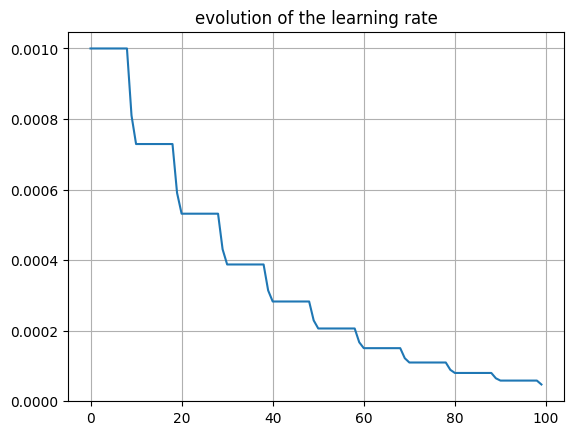

In [38]:
plt.plot(history["learning_rates"])
plt.title("evolution of the learning rate")
plt.grid()
plt.show()